In [27]:
import pandas as pd
import pickle
import numpy as np
import json
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import timeit

In [28]:
df = pd.read_pickle('data/accident.pickle')

In [40]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 200183 entries, 0 to 207449
Data columns (total 32 columns):
OBJECTID            200183 non-null int64
ADDRTYPE            200183 non-null object
LOCATION            200183 non-null object
SEVERITYCODE        200182 non-null object
SEVERITYDESC        200183 non-null object
COLLISIONTYPE       177878 non-null object
PERSONCOUNT         200183 non-null int64
PEDCOUNT            200183 non-null int64
PEDCYLCOUNT         200183 non-null int64
VEHCOUNT            200183 non-null int64
INJURIES            200183 non-null int64
SERIOUSINJURIES     200183 non-null int64
FATALITIES          200183 non-null int64
INCDATE             200183 non-null object
INCDTTM             200183 non-null object
JUNCTIONTYPE        192700 non-null object
UNDERINFL           177899 non-null object
WEATHER             177734 non-null object
ROADCOND            177789 non-null object
LIGHTCOND           177644 non-null object
HITPARKEDCAR        200183 no

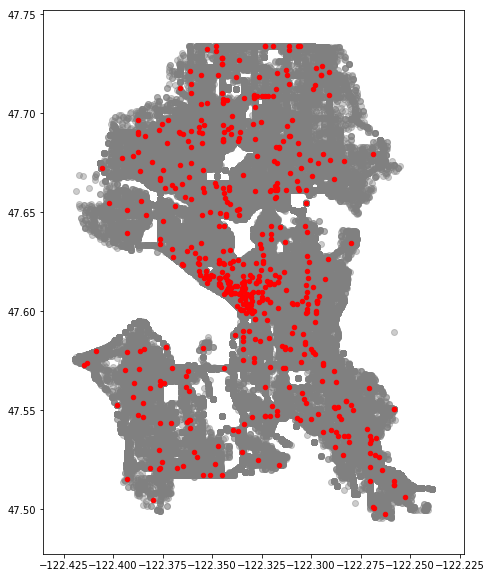

In [29]:
fig, ax = plt.subplots(figsize = (8, 10))
df.plot(ax = ax, alpha = 0.4, color = 'grey')
df[(df['month'] == 12) & (df['day']== 31)].plot(ax = ax, markersize =20, color = 'red', marker = 'o', label = 'Collision')


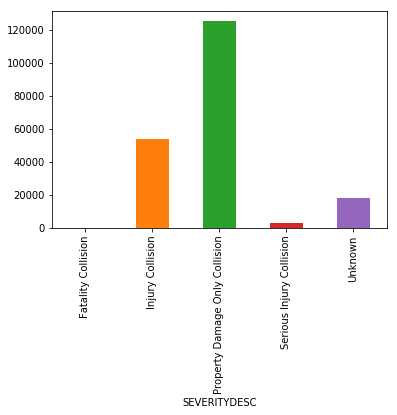

In [17]:
df.groupby('SEVERITYDESC')['SEVERITYDESC'].count().plot(kind= 'bar')

In [75]:
df.groupby('SEVERITYDESC')['SEVERITYDESC'].count()

SEVERITYDESC
Fatality Collision                   309
Injury Collision                   53869
Property Damage Only Collision    125234
Serious Injury Collision            2829
Unknown                            17942
Name: SEVERITYDESC, dtype: int64

In [77]:
309/200183 #+ 53869 + 125234 + 2829 + 17942

0.0015435876173301429

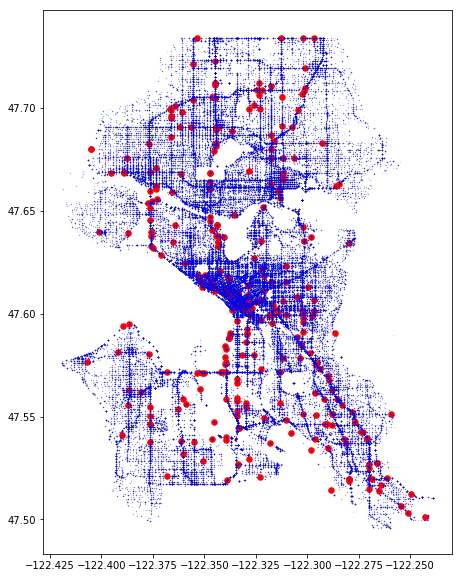

In [74]:
fig, ax = plt.subplots(figsize = (8, 10))
df.plot(ax = ax, alpha = 0.4, color = 'grey', markersize = 0.1)
df[df['SEVERITYDESC']=='Fatality Collision'].plot(ax = ax, markersize =30, color = 'red', marker = 'o', label = 'Collision')
df[df['SEVERITYDESC']=='Property Damage Only Collision'].plot(ax = ax, markersize = .01, color = 'blue', marker = 'o')

In [364]:
label = LabelEncoder()
label.fit(acc['SEVERITYDESC'])
acc.loc[:, 'SEVERITYDESC'] = label.transform(acc['SEVERITYDESC'])

/Users/gulomjon/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [487]:
acc.loc[:, 'WEATHER'] = label.transform(acc['WEATHER'])
acc.loc[:, 'ROADCOND'] = label.transform(acc['ROADCOND'])
acc.loc[:, 'LIGHTCOND'] = label.transform(acc['LIGHTCOND'])

ValueError: y contains previously unseen labels: 'Snowing'

In [336]:
for i in X:
    if X[i].dtype == 'object':
        label.fit(X[i])
        X.loc[:, i] = label.transform(X[i])

/Users/gulomjon/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [490]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68413 entries, 4093 to 199841
Data columns (total 4 columns):
WEATHER      68413 non-null int64
ROADCOND     68413 non-null int64
LIGHTCOND    68413 non-null int64
AAWDT        68413 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.6 MB


In [498]:
X = acc['AAWDT']

(68413,)

In [495]:
y.shape

(68413,)

In [496]:
X_train = X[:28804]
y_train = y[:28804]
X_test = X[28804:]
y_test = y[28804:]

In [500]:
from sklearn.ensemble import RandomForestClassifier
m = RandomForestClassifier(n_estimators=50, criterion='entropy')
m.fit(X_train.values.reshape(-1,1), y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [503]:
print('train score of acuracy', m.score(X_train.values.reshape(-1,1), y_train))
print('test score of accuracy ', m.score(X_test.values.reshape(-1,1), y_test))

train score of acuracy 0.7053534231356756
test score of accuracy  0.6590926304627737


In [505]:
y_ran = np.random.randint(0, 5, size = 39609)

In [507]:
print('random prediction accuracy', m.score(X_test.values.reshape(-1,1), y_ran))

random prediction accuracy 0.19997980257012296


In [509]:
y_pred = m.predict(X_test.values.reshape(-1,1))

In [511]:
from sklearn.metrics import precision_score, recall_score

In [512]:
precision_score(y_test, y_pred, average='micro')

0.6590926304627737

In [513]:
recall_score(y_test, y_pred, average='micro')

0.6590926304627737

In [580]:
ind

array([   1,    2, 1583, 1594, 1595, 1852])

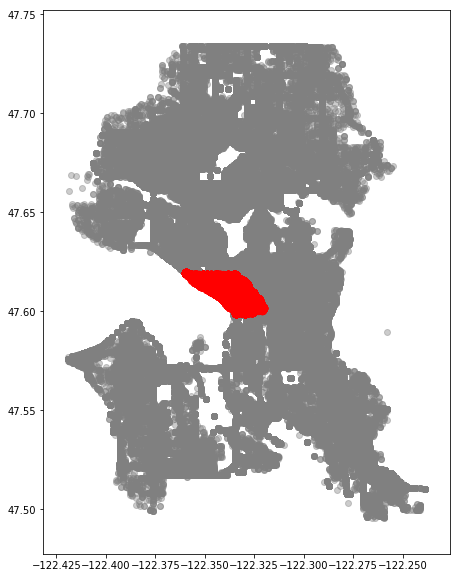

In [32]:
fig, ax = plt.subplots(figsize = (16, 10))
df.plot(ax = ax, alpha = 0.4, color = 'grey')
df[df['DOWNTOWN']=='Y'].plot(ax = ax, markersize =70, color = 'red')


In [43]:
len(df.year.unique())

17

In [44]:
17*1865

31705

In [54]:
df.groupby('year')['year'].count()

year
2003        1
2004    15009
2005    15560
2006    15351
2007    14579
2008    13578
2009    12730
2010    11616
2011    12010
2012    12304
2013    12291
2014    12669
2015    13555
2016    13233
2017    12051
2018    11824
2019     1822
Name: year, dtype: int64

In [72]:
g = df.groupby(['year', 'LOCATION'])

In [73]:
g.count()

OBJECTID  ADDRTYPE  \
year LOCATION                                                                 
2003 BROADWAY AND CHERRY ST                                     1         1   
2004 10TH AVE AND E PIKE ST                                     1         1   
     10TH AVE AND E SENECA ST                                   2         2   
     10TH AVE AND E TERRACE ST                                  1         1   
     10TH AVE AND E UNION ST                                    1         1   
     10TH AVE BETWEEN E ALDER ST AND E TERRACE ST               1         1   
     10TH AVE BETWEEN E MADISON ST AND E SENECA ST              2         2   
     10TH AVE BETWEEN E PIKE ST AND E PINE ST                   2         2   
     10TH AVE BETWEEN E TERRACE ST AND E JEFFERSON ST           1         1   
     10TH AVE BETWEEN E UNION ST AND E PIKE ST                  2         2   
     10TH AVE BETWEEN E YESLER WAY AND E FIR ST                 1         1   
     10TH AVE E AND E ALOHA ST                                  2         2   
     10TH AVE E AND E HIGHLAND DR                               1         1   
     10TH AVE E AND E JOHN ST                                   3         3   
     10TH AVE E AND E LYNN ST                                   1         1   
     10TH AVE E AND E MILLER ST                                 2         2   
     10TH AVE E AND E NEWTON ST                                 1         1   
     10TH AVE E AND E REPUBLICAN ST                             1         1   
     10TH AVE E AND E ROANOKE W ST                              1         1   
     10TH AVE E BETWEEN E ALOHA ST AND E PROSPECT ST            6         6   
     10TH AVE E BETWEEN E BOSTON ST AND E LYNN ST               1         1   
     10TH AVE E BETWEEN E DENNY WAY AND E JOHN ST               1         1   
     10TH AVE E BETWEEN E GARFIELD ST AND E BLAINE ST           1         1   
     10TH AVE E BETWEEN E HARRISON ST AND E REPUBLIC...         1         1   
     10TH AVE E BETWEEN E HOWE ST AND E NEWTON ST               1         1   
     10TH AVE E BETWEEN E JOHN ST AND E THOMAS E ST             1         1   
     10TH AVE E BETWEEN E LYNN ST AND E MILLER ST               8         8   
     10TH AVE E BETWEEN E MERCER ST AND E ROY E ST              1         1   
     10TH AVE E BETWEEN E MILLER ST AND E ROANOKE W ST          5         5   
     10TH AVE E BETWEEN E NEWTON ST AND E BOSTON ST             2         2   
...                                                           ...       ...   
2019 WEST SEATTLE BR EB BETWEEN ALASKAN WY VI NB ON ...         1         1   
     WEST SEATTLE BR EB BETWEEN DELRIDGE-W SEATTLE B...         1         1   
     WEST SEATTLE BR EB BETWEEN W SEA BR EB 4 AV OFF...         1         1   
     WEST SEATTLE BR EB BETWEEN W SEATTLE BR - I5 SB...         1         1   
     WEST SEATTLE BR WB BETWEEN 1ST AV S ON RP AND W...         1         1   
     WEST SEATTLE BR WB BETWEEN ALASKAN WY VI SB WSB...         1         1   
     WEST SEATTLE BR WB BETWEEN HARBOR AV SW OFF RP ...         1         1   
     WEST SEATTLE BR WB BETWEEN POINT A AND 35TH AVE SW         2         2   
     WEST SEATTLE BR WB BETWEEN W SEATTLE BR WB OFF ...         1         1   
     WESTERN AVE BETWEEN BLANCHARD ST AND BELL ST               1         1   
     WESTERN AVE BETWEEN COLUMBIA ST AND MARION ST              1         1   
     WESTERN AVE BETWEEN SENECA ST AND UNIVERSITY ST            1         1   
     WESTLAKE AVE N BETWEEN DENNY WAY AND JOHN ST               1         1   
     WESTLAKE AVE N BETWEEN HALLADAY ST AND NEWELL ST           2         2   
     WESTLAKE AVE N BETWEEN HIGHLAND DR AND GALER S ST          1         1   
     WESTLAKE AVE N BETWEEN REPUBLICAN ST AND MERCER...         2         2   
     WESTLAKE AVE N BETWEEN THOMAS ST AND HARRISON ST           1         1   
     WESTLAKE AVE N BETWEEN VALLEY ST AND 9TH AVE N             1         1   
     WILLIAMS AVE W BETWEEN 